In [18]:
!pip install vaex

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import rv_discrete
import statsmodels
import vaex
import rawpy
import h5py
import pyarrow as pa
import pyarrow.parquet as pq

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
path_raw = './raw_noise/'

rgb = np.memmap('rgb.memmap', dtype='uint8', mode='w+', shape=(1250,4498,6742,3))

files = os.listdir(path_raw)

i=0
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    filename = os.path.join(path_raw, filename)
    raw = rawpy.imread(filename)
    rgb_read = raw.postprocess(use_camera_wb=True, output_color=rawpy.ColorSpace.sRGB)
    rgb[i] = rgb_read
    i+=1
rgb = np.reshape(rgb,(1250*4498*6742,3))
rgb.flush()

Processing iso_640__0250.CR3: 100%|██████████████████████████████████████████████| 1250/1250 [1:26:17<00:00,  4.14s/it]


In [3]:
rgb.shape

(37906895000, 3)

In [2]:
rgb = np.memmap('rgb.memmap', dtype='uint8', mode='r', shape=(37906895000, 3))

In [ ]:
rgb_h5f = h5py.File('rgb.h5', 'w')
rgb_h5f.create_dataset('red', data=rgb[:,0])
rgb_h5f.create_dataset('green', data=rgb[:,1])
rgb_h5f.create_dataset('blue', data=rgb[:,2])
rgb_h5f.close()

In [38]:
rgb_test =rgb[:10]
test_h5f = h5py.File('test1.h5', 'w+')
test_h5f.create_dataset("test1",data=rgb_test[:,0])
test_h5f.create_dataset("test2",data=rgb_test[:,1])
test_h5f.create_dataset("test3",data=rgb_test[:,2])
test_h5f.close()
vf = vaex.open("test1.h5")
vf

#,test1,test2,test3
0,0,0,182
1,45,0,185
2,33,0,158
3,39,0,144
4,4,0,97
5,0,0,0
6,0,42,0
7,13,22,0
8,0,80,0
9,0,146,0


In [29]:
vdf_rgb = vaex.open("rgb.h5")
vdf_rgb.

In [25]:
pa_rgb = pa.table({"red": rgb[:,0], "green": rgb[:,1], "blue": rgb[:,2]})
pq.write_table(pa_rgb, "rgb_table.parquet")

ArrowMemoryError: malloc of size 37906895040 failed

In [20]:
vdf_rgb = vaex.open("rgb.parquet")
vdf_rgb

#,red,green,blue
0,0,45,33
1,0,0,0
2,182,185,158


In [21]:
vdf_rgb.shape

(3, 3)

MemoryError: Unable to allocate 35.3 GiB for an array with shape (37906895000,) and data type uint8

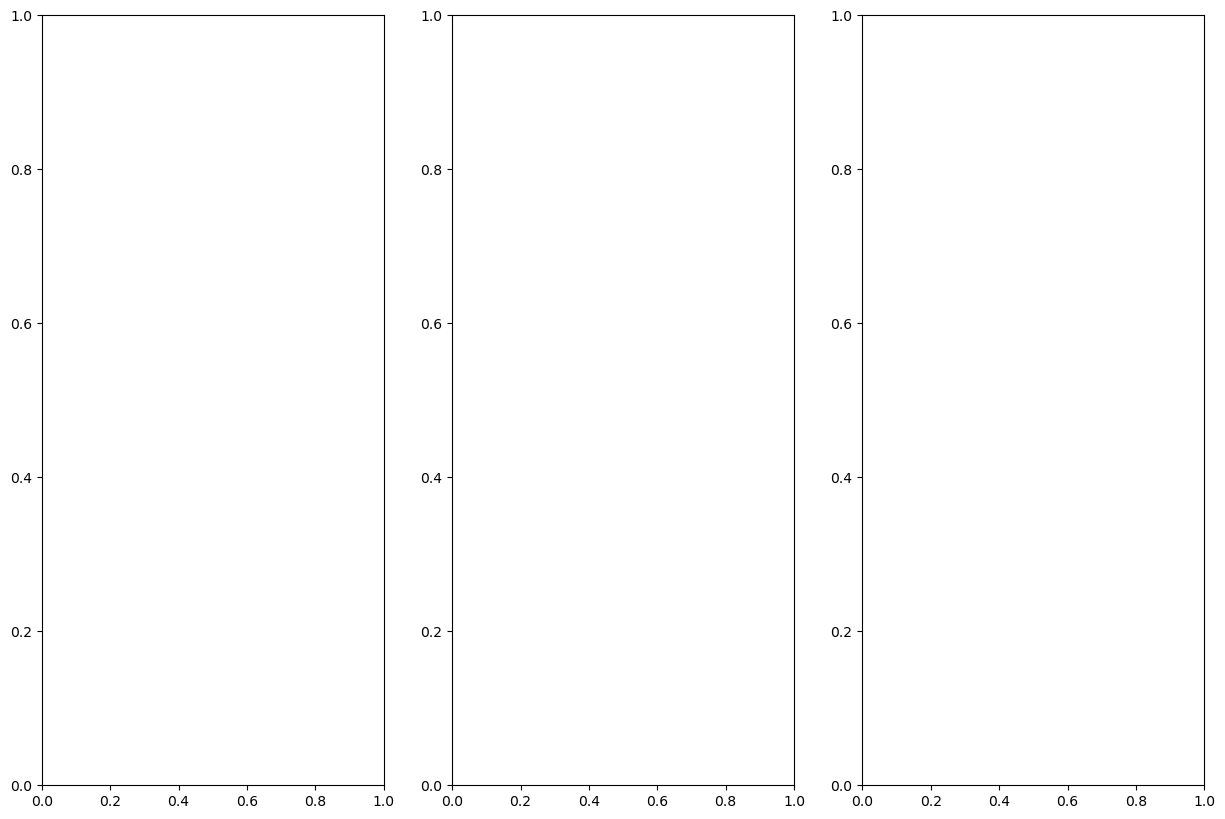

In [7]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.boxplot(rgb_fl[0])
plt.title('red')
plt.subplot(1,3,2)
plt.boxplot(rgb_fl[1])
plt.title('green')
plt.subplot(1,3,3)
plt.boxplot(rgb_fl[2])
plt.title('blue')
plt.show()

In [9]:
df_realnoise = pd.DataFrame(rgb_fl.T, columns=['red','green', 'blue'], copy=False)
df_realnoise.head()

,red,green,blue
0,0,182,0
1,45,185,0
2,33,158,0
3,39,144,0
4,4,97,0


In [14]:
df_realnoise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37906895000 entries, 0 to 37906894999
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   red     uint8
 1   green   uint8
 2   blue    uint8
dtypes: uint8(3)
memory usage: 105.9 GB


MemoryError: Unable to allocate 35.3 GiB for an array with shape (37906895000,) and data type uint8

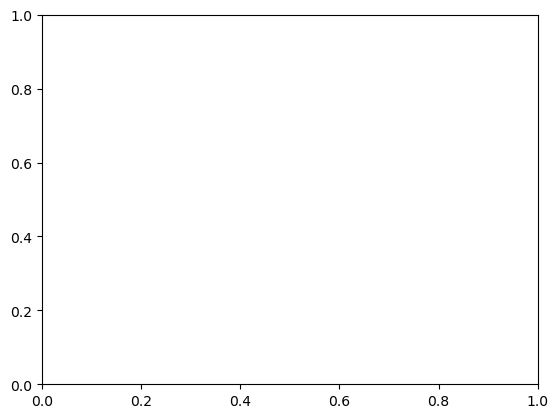

In [26]:
plt.boxplot(rgb_fl[0])
plt.show()

In [51]:
rgb_r.shape

(4498, 6742)

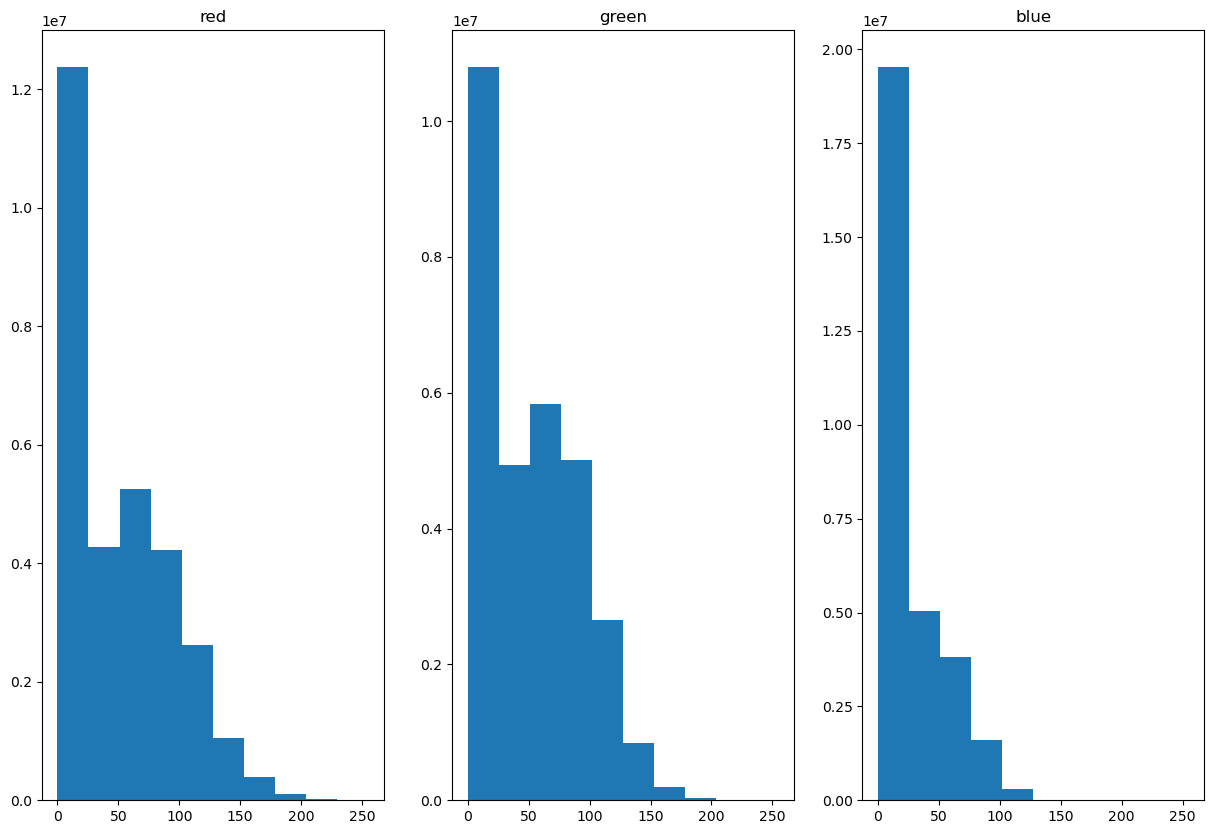

In [9]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.hist(rgb_r.flatten())
plt.title('red')
plt.subplot(1,3,2)
plt.hist(rgb_g.flatten())
plt.title('green')
plt.subplot(1,3,3)
plt.hist(rgb_b.flatten())
plt.title('blue')
plt.show()

In [23]:
vec_counts_r = np.unique(rgb_r.flatten(), return_counts=True)
vec_counts_g = np.unique(rgb_g.flatten(), return_counts=True)
vec_counts_b = np.unique(rgb_b.flatten(), return_counts=True)
length = len(rgb_r.flatten())

In [24]:
vec_x_r = vec_counts_r[0]
vec_p_r = vec_counts_r[1].astype('float32')/length

vec_x_g = vec_counts_g[0]
vec_p_g = vec_counts_g[1].astype('float32')/length

vec_x_b = vec_counts_b[0]
vec_p_b = vec_counts_b[1].astype('float32')/length

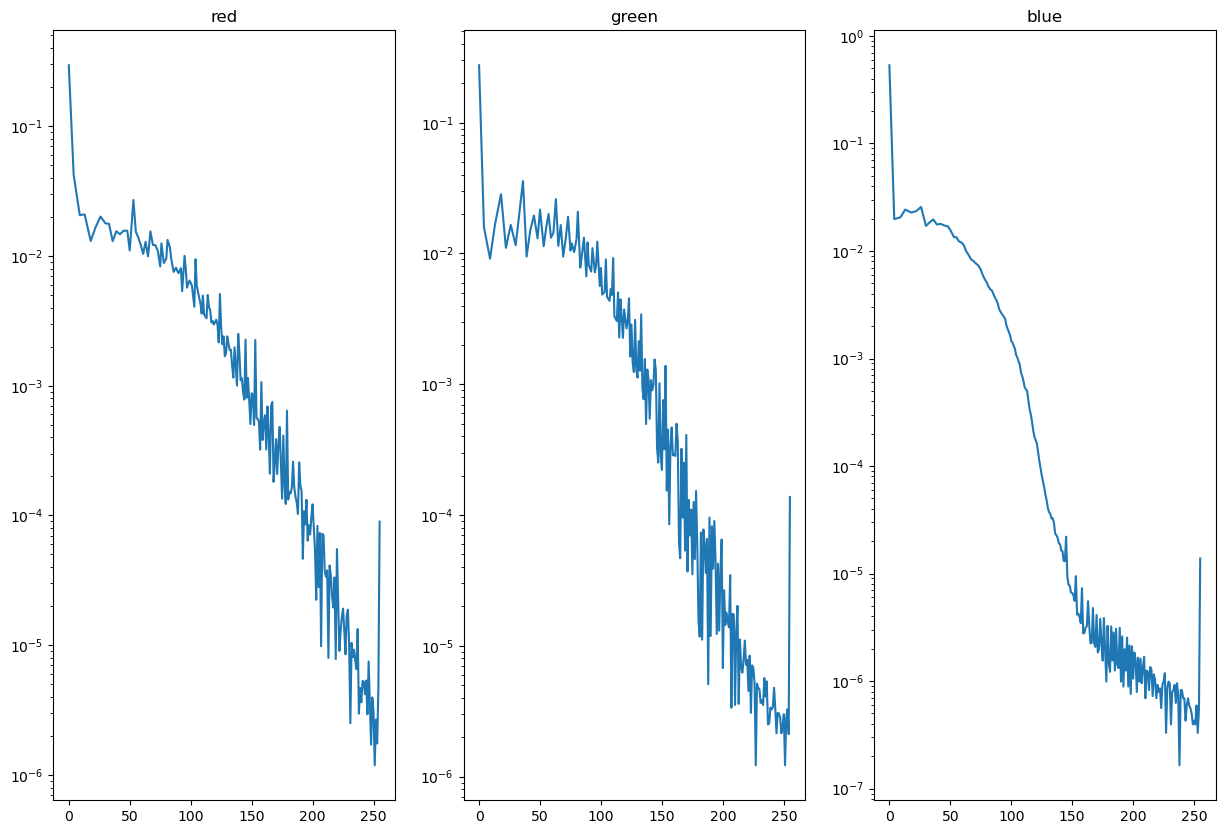

In [25]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.plot(vec_x_r, vec_p_r)
plt.yscale('log')
plt.title('red')
plt.subplot(1,3,2)
plt.plot(vec_x_g, vec_p_g)
plt.yscale('log')
plt.title('green')
plt.subplot(1,3,3)
plt.plot(vec_x_b, vec_p_b)
plt.yscale('log')
plt.title('blue')
plt.show()

In [30]:
sum(vec_p_r)

0.9999999999999994